In [3]:
import numpy as np
from matplotlib import pyplot as plt
import json

In [4]:
run = 1
Gammas = 20.00
rhoseed = 0.9#0.9#0.16
Pi      = 0.03

savedir = '../w_lambda/gammas_{:1.2f}_rhoseed_{:1.2f}_pi_{:1.2f}/run_{:d}/'.format(Gammas, rhoseed, Pi, run)

with open(savedir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]; ndump = int(T/dt_dump)
n_steps   = parameters["n_steps"]  # number of time steps
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
gamma     = parameters["gammaf"]   # traction coefficient
lambd     = parameters["lambda"]
mu        = parameters["mu"]
p0        = parameters["p0"]       # pressure when cells are close packed, should be very high
r_p       = parameters["r_p"]      # rate of pressure growth equal to rate of growth of cells
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])

#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y)

dx = 1/mx; dy = 1/my

times = np.arange(0, ndump+1, 1)*dt_dump

In [5]:
ndump = 2; times = np.arange(0, ndump+1, 1)*dt_dump
rho = np.zeros([ndump+1, mx, my])
v   = np.zeros([ndump+1, mx, my, 2])
Q   = np.zeros([ndump+1, mx, my, 2])

for n in np.arange(0, ndump+1, 1):
    rho[n] += np.loadtxt(savedir+'rho_{:d}.csv'.format(n))
    v[n,:,:,0] += np.loadtxt(savedir+'vx_{:d}.csv'.format(n))
    v[n,:,:,1] += np.loadtxt(savedir+'vy_{:d}.csv'.format(n))
    Q[n,:,:,0] += np.loadtxt(savedir+'Qx_{:d}.csv'.format(n))
    Q[n,:,:,1] += np.loadtxt(savedir+'Qy_{:d}.csv'.format(n))

S     = np.sqrt(2*(np.square(Q[...,0])+np.square(Q[...,1])))
theta = np.arctan2(Q[...,1], Q[...,0])/2
nx    = np.cos(theta)
ny    = np.sin(theta)

1.0363757755338288
1.0305176698111713 -0.0002594294902661762
(array([ 0,  3,  5,  6,  7, 11, 19, 36, 38, 42, 43, 44, 46, 47, 49]), array([19, 11,  8,  7,  6,  3,  0, 47, 46, 43, 42, 41, 38, 36, 31]))


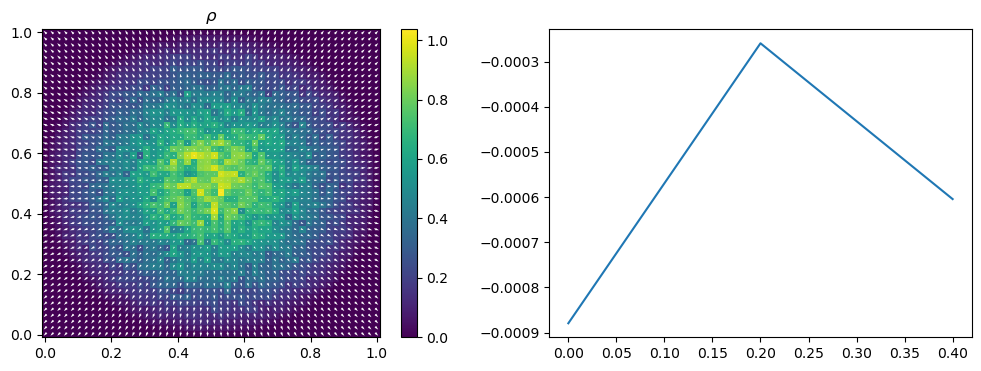

In [6]:
#from matplotlib.colors import LinearSegmentedColormap
fig, ax=plt.subplots(figsize=(12,4), ncols=2)
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
rhomax = np.max(rho); print(rhomax)
i=-2
print(np.max(rho[i]), np.min(rho[i]))
ctrf = [ax[0].pcolormesh(xv, yv, rho[i], cmap='viridis', vmin=np.min(rho[i]), vmax=rhomax), ax[0].quiver(xv,yv,v[i,:,:,0],v[i,:,:,1], color='w', pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i], cmap=cmap1, vmin=np.min(rho), vmax=np.max(rho)), ax.quiver(xv,yv,nx[i],ny[i], color='w', headlength=0, headaxislength=0, width=0.006, pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i]*v[i,:,:,1])]
ax[0].set_title(r'$\rho$')
fig.colorbar(ctrf[0])

ax[1].plot(times, np.min(np.min(rho, axis=2), axis=1))
print(np.where(rho[i]<0))
plt.show()

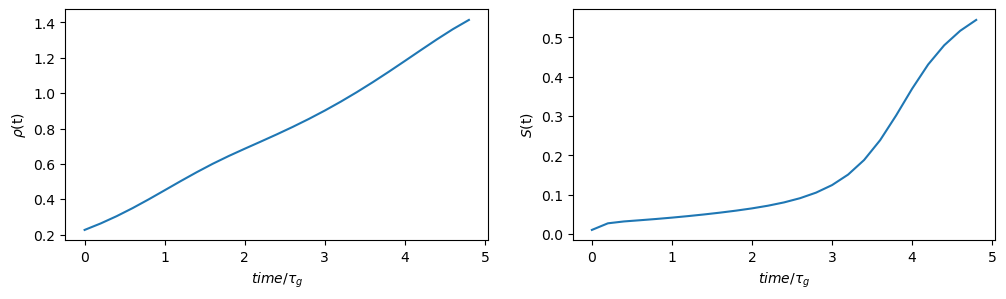

In [13]:
Rho = np.sum(np.sum(rho, axis=2), axis=1)*dx*dy #integrated rho over all space divided by unit area
Ssum= np.sum(np.sum(S, axis=2), axis=1)*dx*dy
fig, ax = plt.subplots(figsize=(12,3), ncols=2)
ax[0].plot(times, Rho); ax[0].set_xlabel(r'$time/\tau_g$'); ax[0].set_ylabel(r'$\rho$(t)');
ax[1].plot(times, Ssum); ax[1].set_xlabel(r'$time/\tau_g$'); ax[1].set_ylabel(r'$S$(t)');

0.44214913747333945
0.44214913747333945 0.4085946795891725


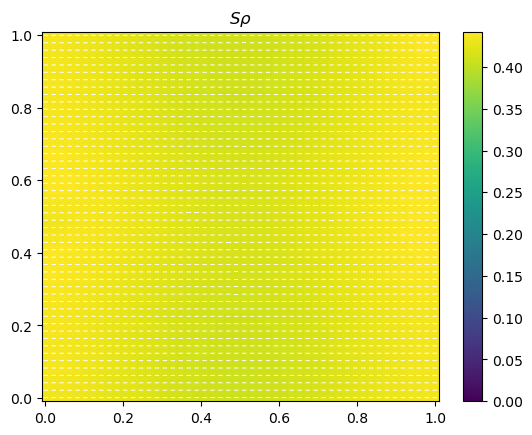

In [23]:
fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
plotfield = S#rho*S
fmax = np.max(plotfield); print(fmax)
i=-1
print(np.max(plotfield[i]), np.min(plotfield[i]))
ctrf = [ax.pcolormesh(xv, yv, plotfield[i], cmap='viridis', vmin=0, vmax=fmax), ax.quiver(xv,yv,nx[i,:,:],ny[i,:,:], color='w', pivot='middle', headlength=0, headaxislength=0)]
#ctrf = [ax.pcolormesh(xv, yv, rho[i], cmap=cmap1, vmin=np.min(rho), vmax=np.max(rho)), ax.quiver(xv,yv,nx[i],ny[i], color='w', headlength=0, headaxislength=0, width=0.006, pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i]*v[i,:,:,1])]
plt.colorbar(ctrf[0])
plt.title(r"$ S \rho $")
plt.show()

1.5008480939628688


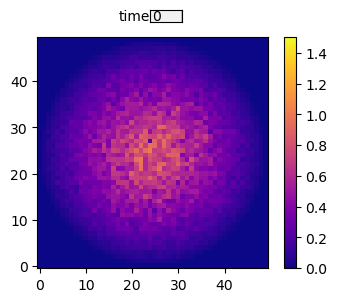

In [24]:
from matplotlib.widgets import Slider, TextBox
fig, ax= plt.subplots(figsize=(4, 3), ncols=1)
vx  = v[:,:,:,0]; vy = v[:,:,:,1]

#plotfield = rho * S_sqrd
plotfield = rho
fmax = np.max(plotfield)
print(fmax)
i=0
sfield = ax.imshow(plotfield[i],cmap='plasma', origin='lower', vmin=0, vmax=fmax)
#parrow = ax.quiver((mx-1)*xv, (my-1)*yv, vx[i], vy[i], color='w', pivot='middle')# color='#b3b3b3')
cb     = fig.colorbar(sfield)#,  anchor=(0, 0.3), shrink=0.7)

#sax = fig.add_axes([0.1,0.94,0.85,0.02])
tbax = fig.add_axes([0.45, 0.93, 0.08, 0.04])
tb = TextBox(tbax, 'time')
#sl = Slider(sax, '', min(times), max(times), valinit=min(times))

def plt_snapshot(val):
	val = (abs(times-val)).argmin()
	#print(val, n_steps)
	sfield.set_data(plotfield[val].T)
	#parrow.set_UVC(vx[val], vy[val])
	fig.canvas.draw_idle()
	tb.set_val(val)	
    #return (sfield, parrow)
#sl.on_changed(plt_snapshot)
from matplotlib.animation import FuncAnimation, writers
anim = FuncAnimation(fig, plt_snapshot, times, interval=10, repeat=True)
dpi = 300
anim.save(savedir+'rho.mp4', dpi=dpi)

0.13015286140986612


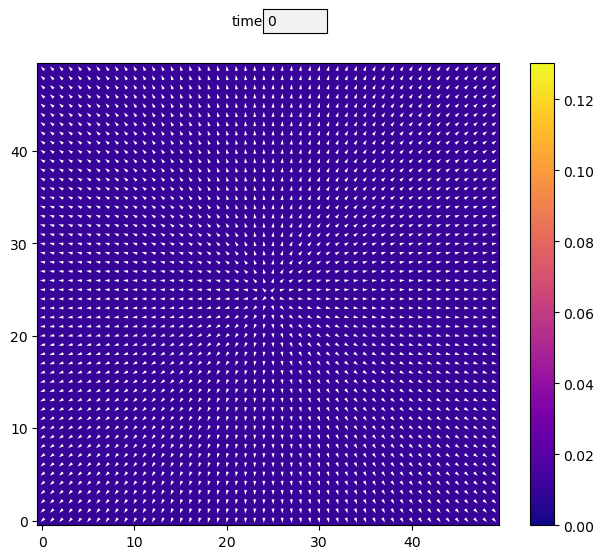

In [8]:
from matplotlib.widgets import Slider, TextBox
fig, ax= plt.subplots(figsize=(8, 6), ncols=1)
vx  = v[:,:,:,0]; vy = v[:,:,:,1]
times = np.arange(0, (ndump-1)*dt_dump, dt_dump)

#plotfield = rho * S_sqrd
plotfield = np.sqrt(vx**2 + vy**2)
fmax = np.max(plotfield)
print(fmax)
i=0
sfield = ax.imshow(plotfield[i].T,cmap='plasma', origin='lower', vmin=0, vmax=fmax)
parrow = ax.quiver((mx-1)*xv, (my-1)*yv, vx[i], vy[i], color='w', pivot='middle')# color='#b3b3b3')
cb     = fig.colorbar(sfield)#,  anchor=(0, 0.3), shrink=0.7)

#sax = fig.add_axes([0.1,0.94,0.85,0.02])
tbax = fig.add_axes([0.45, 0.93, 0.08, 0.04])
tb = TextBox(tbax, 'time')
#sl = Slider(sax, '', min(times), max(times), valinit=min(times))

def plt_snapshot(val):
	val = (abs(times-val)).argmin()
	#print(val, n_steps)
	sfield.set_data(plotfield[val].T)
	parrow.set_UVC(vx[val], vy[val])
	fig.canvas.draw_idle()
	tb.set_val(val)	
    #return (sfield, parrow)
#sl.on_changed(plt_snapshot)
from matplotlib.animation import FuncAnimation, writers
anim = FuncAnimation(fig, plt_snapshot, times, interval=10, repeat=True)
dpi = 300
anim.save(savedir+'v.mp4', dpi=dpi)